# LINEAR REGRESSION 

This particular Ecommerce company based in New York City that sells clothing online but also have in-store style and clothing advice sessions .
The company is trying to decide weather to focus their efforts  on their mobile App  experience or their website.

Importing the neccesary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing the Dataset

In [4]:
df=pd.read_csv(r'C:\Users\DELL LATITUDE E7440\Desktop\python 3\data.csv')


Veiwing the imported dataset

In [6]:
df.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


information on the datatypes involved in our dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


Checking for Missing Data

In [10]:
df.isnull().sum()

\tEmail                 0
Address                 0
Avatar                  0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Checking for duplicates

In [13]:
df.duplicated().sum()

0

Summary of our Dataset

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time on App,500.0,12.05262,0.994418,8.51,11.3900,11.980,12.7525,15.13
Time on Website,500.0,37.06048,1.010555,33.91,36.3475,37.070,37.7200,40.01
Length of Membership,500.0,3.53336,0.999260,0.27,2.9300,3.535,4.1300,6.92
Yearly Amount Spent,500.0,499.31424,79.314764,256.67,445.0375,498.890,549.3125,765.52


# Exploratory Data Analysis

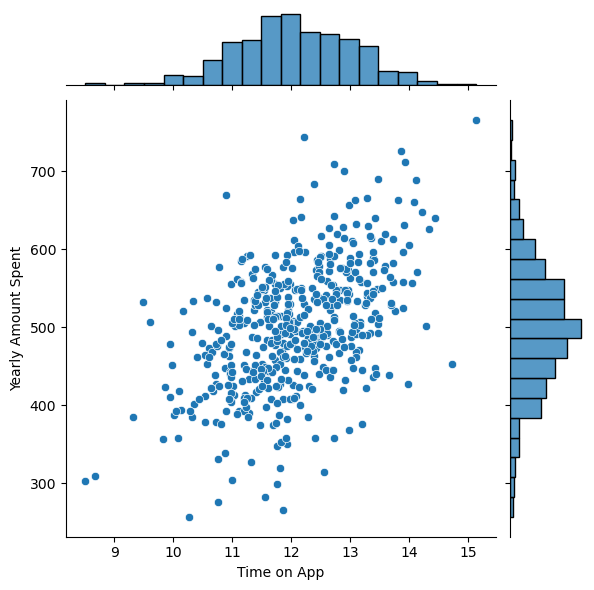

In [20]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent')

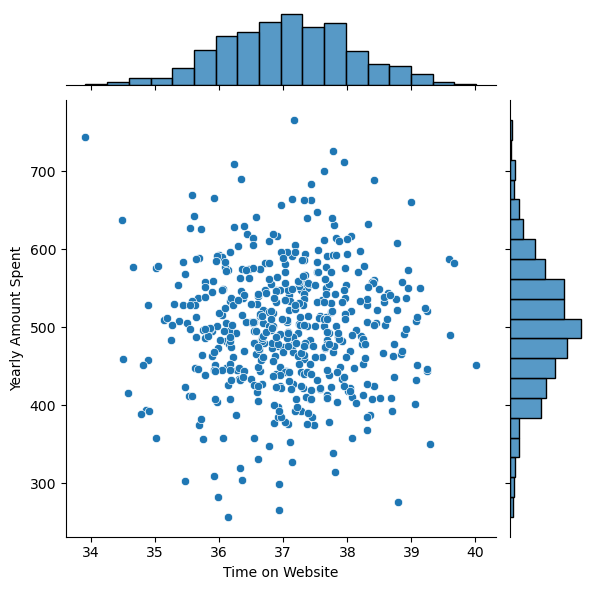

In [22]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')

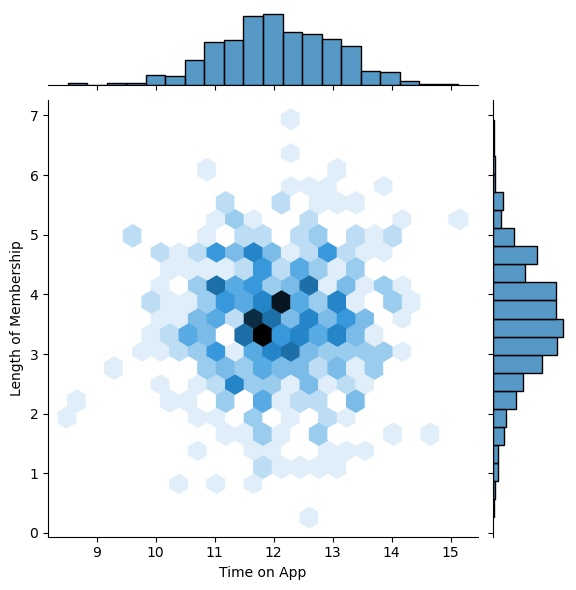

In [24]:
sns.jointplot(data=df,x='Time on App',y='Length of Membership',kind='hex')

C:\Users\DELL LATITUDE E7440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


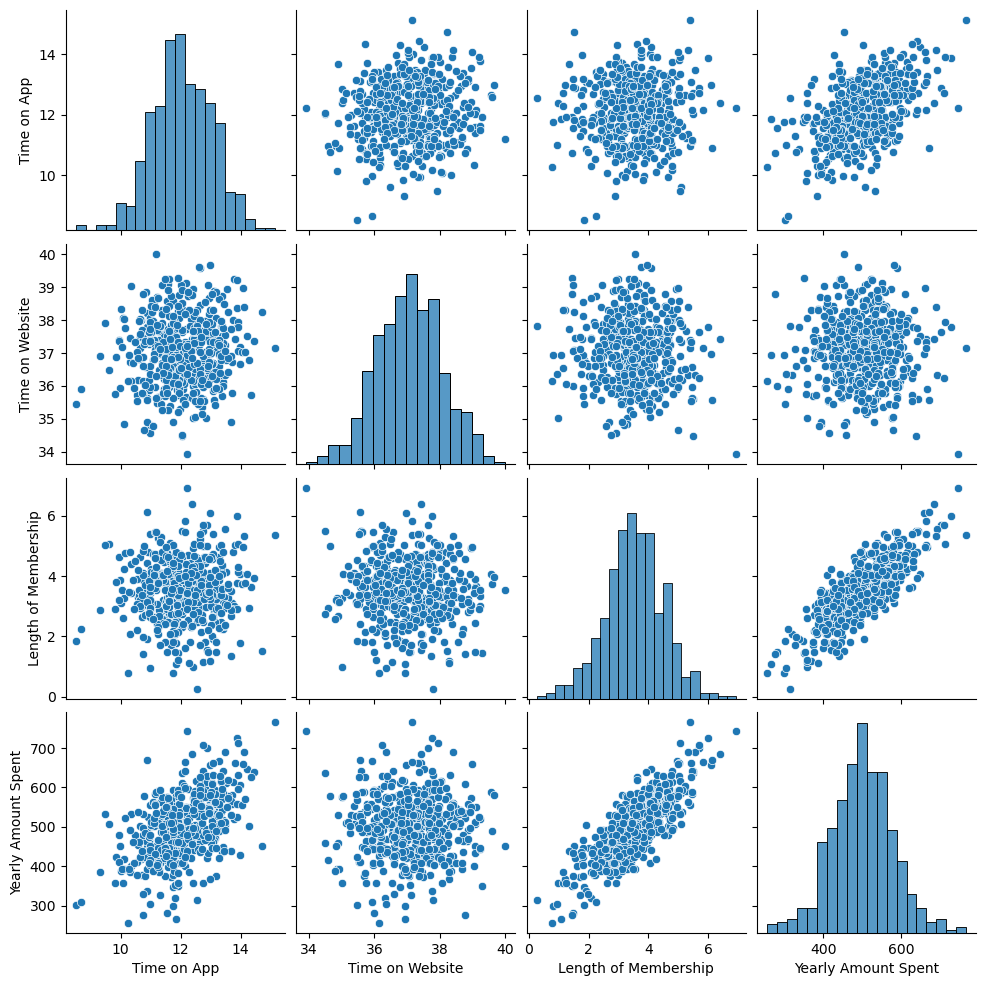

In [26]:
sns.pairplot(df)

From the above pairplot we could see that  the most correlated feature with Yearly Amount Spent is the Length of Membership

C:\Users\DELL LATITUDE E7440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


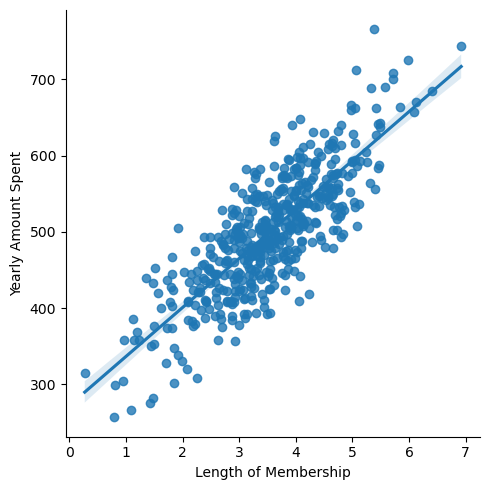

In [28]:
sns.lmplot(data=df,x='Length of Membership',y='Yearly Amount Spent')

# Training and Testing of  the Dataset

In [30]:
df.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


In [40]:
x=df[['Time on App','Time on Website','Length of Membership']]

In [41]:
y=df['Yearly Amount Spent']

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# Training  the Model

In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
lrm=LinearRegression()

In [50]:
lrm.fit(x_train,y_train)

LinearRegression()

In [52]:
lrm.intercept_

-202.95936902590864

In [54]:
lrm.coef_

array([36.73506185,  1.06976162, 62.09959533])

Creating a Coefficient Table

In [57]:
cf=pd.DataFrame(lrm.coef_,x.columns,columns=['Coeff'])
cf

,Coeff
Time on App,36.735062
Time on Website,1.069762
Length of Membership,62.099595


# Predicting Test Data

In [59]:
predictions=lrm.predict(x_test)

In [61]:
predictions 

array([473.07981044, 432.02432416, 454.48639736, 583.75147287,
       609.42494573, 540.98421703, 596.61514489, 663.83509351,
       433.9073262 , 562.8038271 , 358.42473726, 479.31501402,
       566.89992805, 401.82552046, 726.69028122, 556.82907569,
       658.02412094, 515.36499761, 557.27370559, 589.20410831,
       491.19074955, 526.64587663, 421.25635106, 498.0612726 ,
       567.01846695, 402.47078965, 527.85855031, 388.9857674 ,
       538.90012727, 473.55648678, 602.87293773, 611.15597464,
       478.68718326, 533.11479138, 503.69758516, 548.1764456 ,
       449.94125779, 459.75144876, 408.44604383, 482.70025253,
       584.55066866, 479.94815828, 613.86893347, 522.49233309,
       459.6739105 , 525.63524403, 539.62146773, 551.06635111,
       377.34303681, 493.60380686, 483.89302563, 517.5806061 ,
       261.66223062, 507.5560761 , 507.49912361, 298.01841501,
       523.20107843, 398.91369949, 495.21483351, 421.06397737,
       550.8856995 , 563.31770746, 711.58055218, 594.85

Text(0, 0.5, 'predictions')

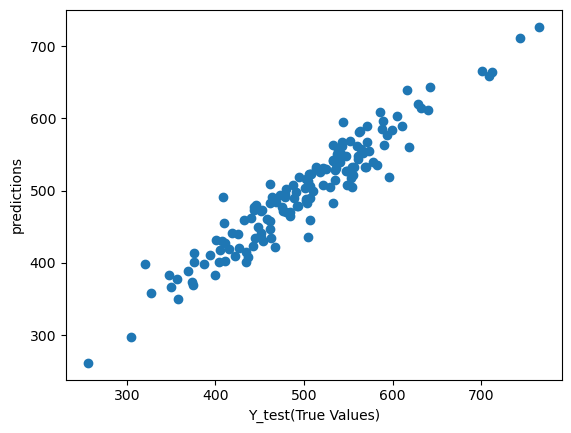

In [63]:
plt.scatter(y_test,predictions)
plt.xlabel('Y_test(True Values)')
plt.ylabel('predictions')

# Evaluating the model

In [65]:
from sklearn import metrics

In [67]:
mae=metrics.mean_absolute_error(y_test,predictions)
mse=metrics.mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)

In [70]:
print('The mean absolute error:',mae)
print('The mean squared error:',mse)
print('The root mean square error:',rmse)

The mean absolute error: 20.68662778076647
The mean squared error: 678.3961717781159
The root mean square error: 26.046039464343057


# Coefficient of Determination

In [73]:
cd=metrics.explained_variance_score(y_test,predictions)
print('The r2 score for this model is:',cd)

The r2 score for this model is: 0.9068561842704587


# Residuals

C:\Users\DELL LATITUDE E7440\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


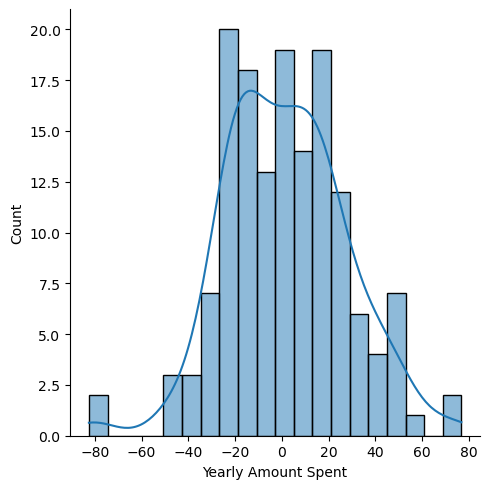

In [78]:
sns.displot((y_test-predictions),bins=20,kde=True)

We could see from our resiiduals that it is normally distributed 